**Varsha Yarram and Michelle Phan**

Fall 2024

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Goal

**Make sure any debug printouts do not appear if `verbose=False`!**

This week, you will test your CNN on the STL-10 dataset! The last step before you can do this is implementing an optimizer to update your network weights during gradient descent. You will implement a few and compare them.

## Task 5: Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. You will implement 4 popular algorithms:

1. `SGD` (stochastic gradient descent)
2. `SGD_Momentum` (stochastic gradient descent with momentum)
3. `Adam` (Adaptive Moment Estimation)
4. `AdamW` (Adaptive Moment Estimation Weight decay) <br/>*Skip AdamW for now. There is a task below that focuses on this optimizer.*

Implement each of these according to the update equations (the `update_weights()` in each subclass in `optimizer.py`). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$v_{t} = \beta_1 \times v_{t-1} + (1 - \beta_1)\times dw$

$p_{t} = \beta_2 \times p_{t-1} + (1 - \beta_2)\times dw^2$

$vc = v_{t} / \left (1-(\beta_1^t) \right )$

$pc = p_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times vc \right ) / \left ( \sqrt(pc) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $v$ and $p$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $vc$ and $pc$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 


In [6]:
from optimizer import *

####  Test SGD

In [14]:
rng = np.random.default_rng(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = rng.standard_normal(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.012573  -1.9867895 -1.0640423 -0.01049    1.0535669  1.9638405]
SGD: Wts after 2 iter [-3.025146  -1.973579  -1.1280845 -0.02098    1.1071339  1.927681 ]


Output should be:

    SGD: Wts after 1 iter [-3.012573  -1.9867895 -1.0640423 -0.01049    1.0535669  1.9638405]
    SGD: Wts after 2 iter [-3.025146  -1.973579  -1.1280845 -0.02098    1.1071339  1.927681 ]

####  Test SGD_Momentum

In [7]:
rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 0.3582333 -0.1102257  0.7650137  0.1781269]
 [-0.4812435  0.3932251  1.262837   0.8428296]
 [-0.6908818 -1.4020678 -0.556755   0.006175 ]]
SGD M: Wts after 2 iter
[[ 0.7302382 -0.075219   0.9643595  0.2952896]
 [-0.394162   0.4438331  1.1969761  0.6760275]
 [-0.6703162 -1.620702  -0.4503238 -0.0500666]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 0.3582333 -0.1102257  0.7650137  0.1781269]
    [-0.4812435  0.3932251  1.262837   0.8428296]
    [-0.6908818 -1.4020678 -0.556755   0.006175 ]]
    SGD M: Wts after 2 iter
    [[ 0.7302382 -0.075219   0.9643595  0.2952896]
    [-0.394162   0.4438331  1.1969761  0.6760275]
    [-0.6703162 -1.620702  -0.4503238 -0.0500666]]

####  Test Adam

In [8]:
rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 0.2257302 -0.0321049  0.7404226  0.2049001]
 [-0.4356694  0.4615951  1.204      0.847081 ]
 [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
Adam: Wts after 2 iter
[[ 0.3257302  0.0678951  0.8404226  0.3049001]
 [-0.3356694  0.561595   1.104      0.747081 ]
 [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
Adam: Wts after 3 iter
[[ 0.4257302  0.1678951  0.9404226  0.4049001]
 [-0.2356694  0.661595   1.0040001  0.647081 ]
 [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]]


Output should be:

    Adam: Wts after 1 iter
    [[ 0.2257302 -0.0321049  0.7404226  0.2049001]
    [-0.4356694  0.4615951  1.204      0.847081 ]
    [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
    Adam: Wts after 2 iter
    [[ 0.3257302  0.0678951  0.8404226  0.3049001]
    [-0.3356694  0.561595   1.104      0.747081 ]
    [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
    Adam: Wts after 3 iter
    [[ 0.4257302  0.1678951  0.9404226  0.4049001]
    [-0.2356694  0.661595   1.0040001  0.647081 ]
    [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]] 

## Task 6: Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`

## Task 7: Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-based neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10 to perform the overfitting test.

### 7a. Move `load_stl10_dataset` and `preprocess_data.py` from the MLP project

Make the one following change in `preprocess_data.py`:

- In `preprocess_stl`, Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)
- In `load_stl10`, add an optional parameter to the function `scale_fact=3`, which specifies the factor by which to downscale the STL-10 images. The default (`scale_fact=3`) reduces the resolution from 96x96 to 32x32. Achieve this downscaling by passing along the optional parameter value when the `load` function in `load_stl10_dataset.py`.

In [5]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4

### 7b. Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Note:** The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [48]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 3, 16, 16)
Train labels shape:  (4578,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (20, 3, 16, 16)
dev labels shape:  (20,)


### 7c. Train and overfit the network on a small STL-10 sample with each optimizer

#### Goal

If your network works, you should see a drop in loss over epochs to 0 from the initial value of ~2.3.

#### Todo

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer — SGD, SGD-M, and Adam (i.e. each net uses a different optimizer and skip AdamW here).
- Train each on the **dev** set and validate on the tiny validation set (we don't care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

#### Guidelines

- To set up a fair comparison across optimizers, you should train your networks with the same hyperparameters each time (*e.g. don't use a different learning rate for different optimizers*).
- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~15 mins on my laptop.

#### Caveat emptor

Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours.

- Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss.
- Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction.

In [49]:
# Adam
# Compilet net1 with Adam optimizer
net1 = ConvNet4(input_shape=(3, 16, 16), n_classes=10, wt_scale=1e-2, verbose=False)
net1.compile(optimizer_name='adam', lr=1e-2)
loss_history_adam, train_acc_history_adam, val_acc_adam = net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=50, acc_freq=2, print_every=6)

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3118478147094472
Training accuracy:  0.25 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  3.9992239475250244
Iteration 0 , Loss:  2.725187326009368
Training accuracy:  0.2 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  4.1983397006988525
Iteration 0 , Loss:  1.650226050614863
Training accuracy:  0.35 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  4.058704853057861
Iteration 0 , Loss:  2.154646728587829
Training accuracy:  0.55 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 3 in seconds:  4.068152904510498
Iteration 0 , Loss:  1.7866287612870153
Training accuracy:  0.55 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 4 in seconds:  3.968380928039551
Iteration 0 , Loss:  1.6504952505638746
Training accuracy:  0.6 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in seconds:  4.0

In [50]:
print(len(loss_history_adam), len(train_acc_history_adam), len(val_acc_adam))

100 50 50


In [51]:
# SGD-M

# Compilet net2 with SGD-M optimizer
net2 = ConvNet4(input_shape=(3, 16, 16), n_classes=10, wt_scale=1e-2, verbose=False)
net2.compile(optimizer_name='sgd_momentum', lr=1e-2)

loss_sgd_m, accuracy_sgd_m, val_acc_sgd_m = net2.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=50, acc_freq=2, print_every=6)

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.3006120186699506
Training accuracy:  0.0 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  4.070188999176025
Iteration 0 , Loss:  2.299556419662743
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 1 in seconds:  4.019292831420898
Iteration 0 , Loss:  2.2909013331635464
Training accuracy:  0.3 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  4.053972959518433
Iteration 0 , Loss:  2.2860335919212456
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  4.2132978439331055
Iteration 0 , Loss:  2.2556950267992724
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  4.0675530433654785
Iteration 0 , Loss:  2.259475873830473
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in seconds:  4.

In [52]:
print(len(loss_sgd_m), len(accuracy_sgd_m), len(val_acc_sgd_m))

100 50 50


In [53]:
# SGD

# Compilet net3 with SGD optimizer
net3 = ConvNet4(input_shape=(3, 16, 16), n_classes=10, wt_scale=1e-2, verbose=False)
net3.compile(optimizer_name='sgd', lr=1e-2)
loss_sgd, accuracy_sgd, validation_acc_history_sgd = net3.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz = 15, n_epochs=50, acc_freq=2, print_every=6)

In each epoch, the number of iterations is 2
acc_frq is 2
Iteration 0 , Loss:  2.305274969832203
Training accuracy:  0.15 ; Validation accuracy:  0.0
Run time of interation 0 of epoch 0 in seconds:  3.99926495552063
Iteration 0 , Loss:  2.308358155352083
Training accuracy:  0.2 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 1 in seconds:  4.1180100440979
Iteration 0 , Loss:  2.3055991200581354
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 2 in seconds:  4.133681774139404
Iteration 0 , Loss:  2.2982539649676528
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 3 in seconds:  4.727672100067139
Iteration 0 , Loss:  2.2917218537191593
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 4 in seconds:  4.231332778930664
Iteration 0 , Loss:  2.3008996550461966
Training accuracy:  0.25 ; Validation accuracy:  0.5
Run time of interation 0 of epoch 5 in seconds:  4.1170

In [54]:
print(len(loss_sgd), len(accuracy_sgd), len(validation_acc_history_sgd))

100 50 50


### 7d. Evaluate and plot the different optimizer results

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

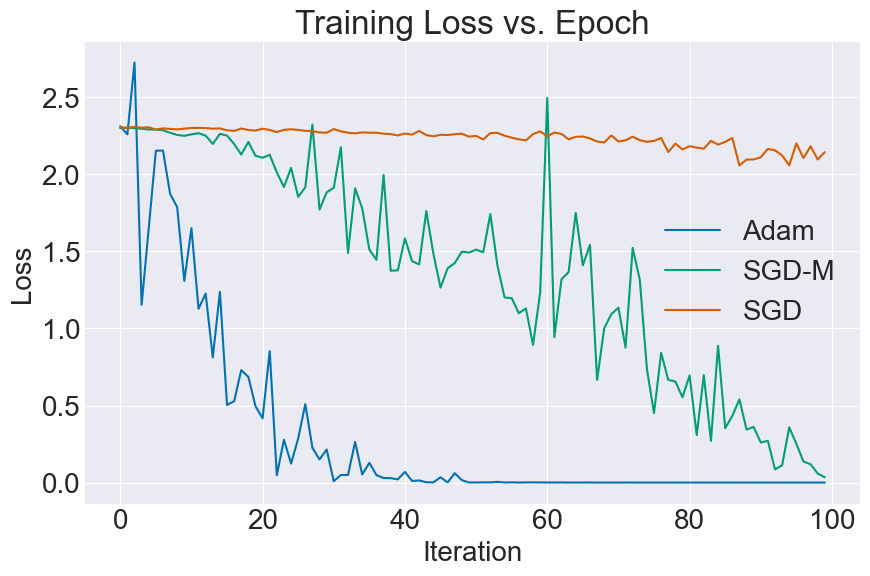

In [58]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history_adam, label='Adam')
plt.plot(loss_sgd_m, label='SGD-M')
plt.plot(loss_sgd, label='SGD')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
    

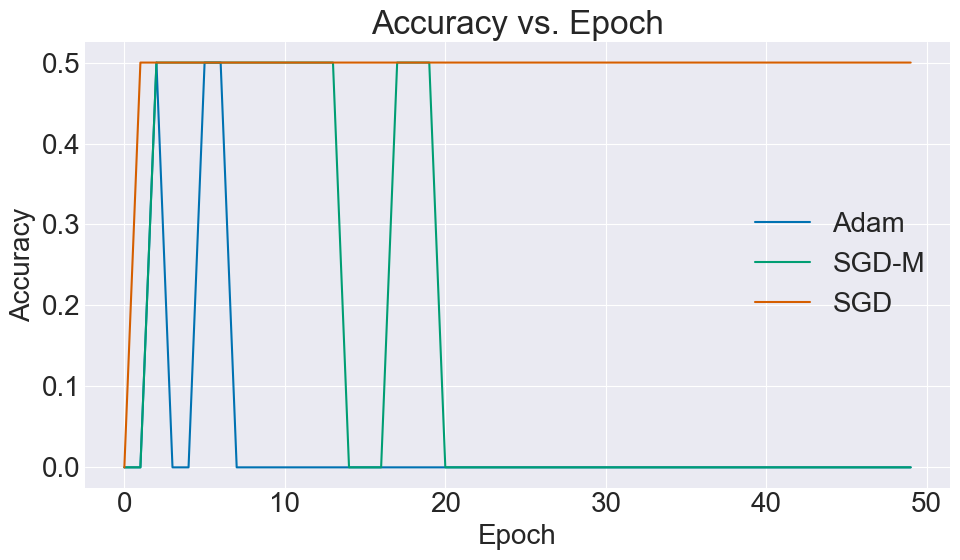

In [60]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(val_acc_adam, label='Adam')
plt.plot(val_acc_sgd_m, label='SGD-M')
plt.plot(validation_acc_history_sgd, label='SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### 7e. Questions

**Question 4**: Why does decreasing the mini-batch size make the loss print-outs more erratic in Task 7c?

**Question 5**: Which optimizer works best and why do think it is best?

**Question 6**: What is happening with the training set accuracy and why?

**Answer 4:**

With a smaller mini-batch, each batch contains fewer examples, making it less representative of the overall dataset. As a result, the gradient computed from this batch is more influenced by the specific examples in that batch and is less smooth.


**Answer 5:**

Adam works best as it reaches loss around 0 the fastest, and then SGD_M, and then SGD is way slower. 

Is is because Adam djusts the learning rate for each parameter based on estimates of the first and second moments of the gradients. This allows it to adaptively handle different scales of updates, which can accelerate convergence. Adam combines the benefits of momentum (which smooths updates and helps with faster convergence) and SGD (which scales learning rates based on the recent magnitudes of gradients)


**Answer 6:**

The training set accuracy reaches almost 100%, meaning that the networks are overfitting the training set as the loss functions converge to 0. The training accuracy functions increase exponentially and then plateau, because the networks end up memorizing the dataset (as the dataset are too small and n_epochs is quite large) instead of learning the dataset patterns 


## Task 8: Training your convolutional neural network on STL-10

### 8a. Load in STL-10 at 32x32 resolution

In [6]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


### 8b. Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=20) in a reasonable amount of time. The training set has N≅4000 samples, how will we ever manage to process that amount of data?!

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to optimized machine code tailored for your computer using the JAX library, we will speed up training up by several orders of magnitude**. JAX should automatically "max out" all the CPU cores your computer has available to speed up training.

Follow these steps to substitute in the "accelerated" convolution and max pooling layers.

- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`.
- Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPooling2D` layers with `Conv2DAccel` and `MaxPooling2DAccel`.

### 8c. Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve at least 45% accuracy on the test and/or validation set.

#### Notes

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take roughly 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [3]:
from network import ConvNet4Accel

In [42]:
# netAccel = ConvNet4Accel(input_shape=(3, 32, 32), n_kers=(32,), dense_interior_units=(200,) ,n_classes=10, verbose=False)
# netAccel.compile(optimizer_name='adam', lr=1e-3)
# loss_history_adam, train_acc_history_adam, val_acc_adam = netAccel.fit(x_train, y_train, x_val, y_val, n_epochs=100)
netAccel = ConvNet4Accel(input_shape=(3, 32, 32), n_classes=10, verbose=False)
netAccel.compile(optimizer_name='adam')
loss_history_adam, train_acc_history_adam, val_acc_adam = netAccel.fit(x_train, y_train, x_val, y_val, n_epochs=100)

In each epoch, the number of iterations is 18
acc_frq is 10
Iteration 0 , Loss:  2.302441036332997
Training accuracy:  0.09890859481582538 ; Validation accuracy:  0.12
Run time of interation 0 of epoch 0 in seconds:  5.732512950897217
Training accuracy:  0.23351523419736245 ; Validation accuracy:  0.21
Iteration 0 , Loss:  1.971014908415817
Training accuracy:  0.25261482492041837 ; Validation accuracy:  0.245
Run time of interation 0 of epoch 1 in seconds:  5.460417985916138
Training accuracy:  0.28831286948613005 ; Validation accuracy:  0.255
Iteration 0 , Loss:  1.863689833902455
Training accuracy:  0.3292405638926785 ; Validation accuracy:  0.27
Run time of interation 0 of epoch 2 in seconds:  5.3206398487091064
Training accuracy:  0.3494770350159163 ; Validation accuracy:  0.325
Iteration 0 , Loss:  1.7030196854819994
Training accuracy:  0.36653024101864484 ; Validation accuracy:  0.31
Run time of interation 0 of epoch 3 in seconds:  5.484311819076538
Training accuracy:  0.38472032

### 8d. Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

In [ ]:
# Plot 2: Loss vs Iterations for Three Optimizers
plt.figure(figsize=(10, 5))
plt.plot(train_acc_history_adam, label="Training Accuracy", linestyle='-')
plt.plot(val_acc_adam, label="Validation Accuracy")
plt.title("Training and Validation Accuracy vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'train_acc_history_adam' is not defined

<Figure size 1000x500 with 0 Axes>

/var/folders/bp/y6l0qmv94kq81jmc42xf416w0000gn/T/ipykernel_26248/404524465.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


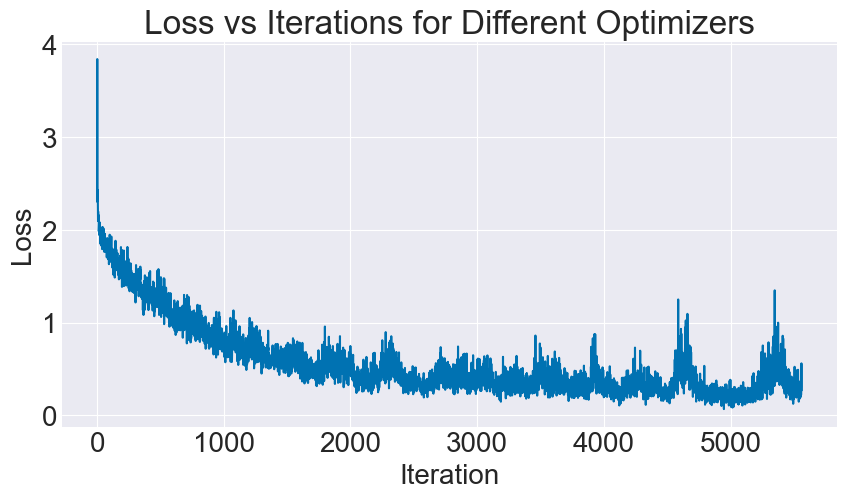

In [ ]:
# Plot 2: Loss vs Iterations for Three Optimizers
plt.figure(figsize=(10, 5))
plt.plot(loss_history_adam, linestyle='-', label='Adam')
plt.title("Loss vs Iterations for Different Optimizers")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### 8e. Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [44]:
def plot_weights(wts, saveFig=True, filename='convWts.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(5,5))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    if saveFig:
        plt.savefig(filename)
    plt.show()

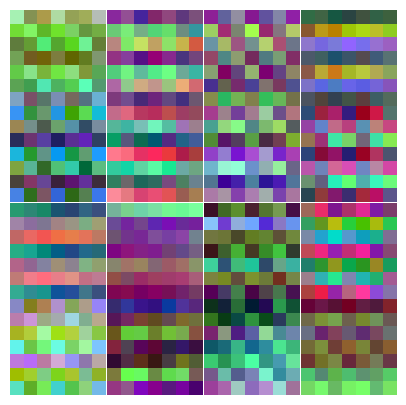

In [45]:
# Subsitute your trained network below
# netT is my network's name
# Every weight should not look like RGB noise
plot_weights(netAccel.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters.png')

### 8f. Questions

**Question 7:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

#### Note

You should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer 7:**

I see edges here the differences between lines of color (or see lines). This makes sense to me because the first layer of the network should learn line from the images input. It resemble cell receptive fields of human eyes

## Task 9: Dropout

Now you are ready to explore how adding a Dropout layer to your CNN affects training and the accuracy of predictions.

### 9a. Create ConvNet4AccelV2 network

- Create a class in `network.py` called `ConvNet4AccelV2` that is the same as `ConvNet4Accel` except that we now add a single dropout layer before the output layer. The layers of your network should now look like:

Conv2D → MaxPool2D → Flatten → Dense → **Dropout** → Dense

In [1]:
from network import ConvNet4AccelV2

### 9b. Analyze effect of dropout on STL-10 loss and accuracy

Run an experiment in which you train five separate `ConvNet4AccelV2` nets, each with the same default hyperparameters except set the dropout rates to be `[0.0, 0.1, 0.5, 0.9]`, respectively. For example, the first net should have 0 dropout, the 2nd should have 0.1 dropout, etc. 

Create two high quality plots showing the:
1. training loss
2. test accuracy

produced by each network.

**Training notes:**
- Use the optimizer that you found performs best from above.
- Use a random seed of `0` in all your nets.
- You should be able to keep most/all hyperparameters to their default values for this experiment.
- Training for only `5` epochs should be enough to produce the expected pattern of results. This means that the experiment should take only a few minutes to run. *You should be get higher accuracy if you train for more than 5 epochs (and you may do so if you so wish) but 5 epochs should be enough to demonstrate the effects of dropout, which is the goal here.*

If everything is working properly, you should find that at least one of the dropout settings yields better test accuracy than you found in Task 8.

In [7]:
# train 5 separate ConvNet4AccelV2 networks with same default hyperparameters expect dropout rate 
# dropout rate should be [0.0, 0.1, 0.5, 0.9]
net_with_dropout_1 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.0, r_seed=0)
net_with_dropout_2 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.1, r_seed=0)
net_with_dropout_3 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.5, r_seed=0)
net_with_dropout_4 = ConvNet4AccelV2(input_shape=(3, 32, 32), n_classes=10, verbose=False, dropout_rate=0.9, r_seed=0)

# train 5 separate ConvNet4AccelV2 networks with same default hyperparameters
net_with_dropout_1.compile(optimizer_name='adam', lr=1e-2)
net_with_dropout_2.compile(optimizer_name='adam', lr=1e-2)
net_with_dropout_3.compile(optimizer_name='adam', lr=1e-2)
net_with_dropout_4.compile(optimizer_name='adam', lr=1e-2)

loss_history_adam_1, train_acc_history_adam_1, val_acc_adam_1 = net_with_dropout_1.fit(x_train, y_train, x_val, y_val, mini_batch_sz = 200, n_epochs=5, acc_freq=50, print_every=100)
loss_history_adam_2, train_acc_history_adam_2, val_acc_adam_2 = net_with_dropout_2.fit(x_train, y_train, x_val, y_val, mini_batch_sz = 200, n_epochs=5, acc_freq=50, print_every=100)
loss_history_adam_3, train_acc_history_adam_3, val_acc_adam_3 = net_with_dropout_3.fit(x_train, y_train, x_val, y_val, mini_batch_sz = 200, n_epochs=5, acc_freq=50, print_every=100) 
loss_history_adam_4, train_acc_history_adam_4, val_acc_adam_4 = net_with_dropout_4.fit(x_train, y_train, x_val, y_val, mini_batch_sz = 200, n_epochs=5, acc_freq=50, print_every=100)

In each epoch, the number of iterations is 22
acc_frq is 50
Iteration 0 , Loss:  2.3026591375728453
Training accuracy:  0.13233287858117326 ; Validation accuracy:  0.15
Run time of interation 0 of epoch 0 in seconds:  6.821012020111084
Iteration 0 , Loss:  2.012881193173874
Training accuracy:  0.26557526148249205 ; Validation accuracy:  0.265
Run time of interation 0 of epoch 1 in seconds:  6.163947105407715
Iteration 0 , Loss:  1.821092805367726
Training accuracy:  0.3085493406093679 ; Validation accuracy:  0.3
Run time of interation 0 of epoch 2 in seconds:  5.513511896133423
Iteration 0 , Loss:  1.8267720986631595
Training accuracy:  0.3312869486130059 ; Validation accuracy:  0.275
Run time of interation 0 of epoch 3 in seconds:  5.948825120925903
Iteration 0 , Loss:  1.6764720703864846
Training accuracy:  0.34492951341518874 ; Validation accuracy:  0.275
Run time of interation 0 of epoch 4 in seconds:  5.718217849731445
Total training time in seconds:  65.8952887058258
In each epoc

In [13]:
import matplotlib.pyplot as plt

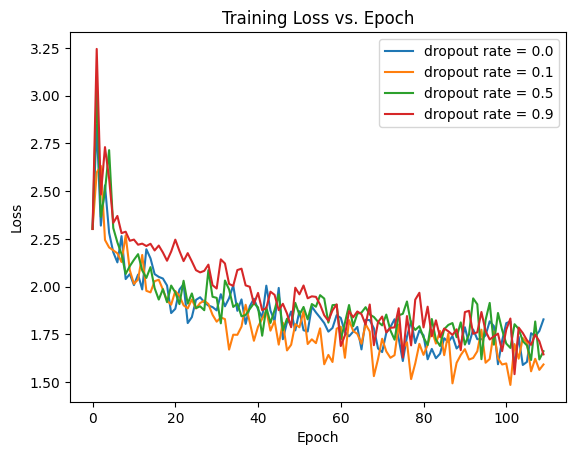

In [16]:
# Plot training loss in y_axis and epoch in x_axis
plt.plot(loss_history_adam_1)
plt.plot(loss_history_adam_2)    
plt.plot(loss_history_adam_3)         
plt.plot(loss_history_adam_4)
plt.legend(['dropout rate = 0.0', 'dropout rate = 0.1', 'dropout rate = 0.5', 'dropout rate = 0.9', 'dropout rate = 1.0'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.show()

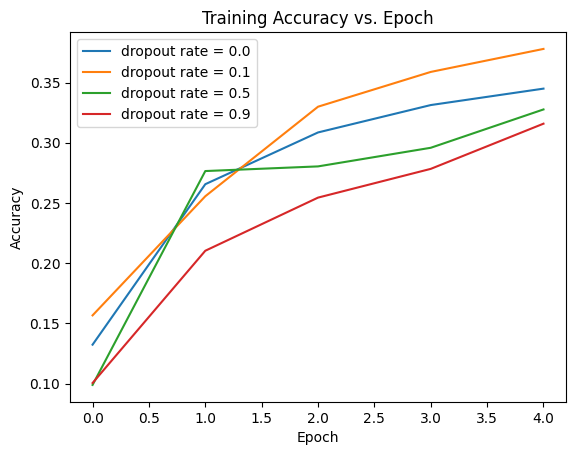

In [17]:
# Plot test accuracy in y_axis and epoch in x_axis
plt.plot(train_acc_history_adam_1)
plt.plot(train_acc_history_adam_2)    
plt.plot(train_acc_history_adam_3)         
plt.plot(train_acc_history_adam_4)
plt.legend(['dropout rate = 0.0', 'dropout rate = 0.1', 'dropout rate = 0.5', 'dropout rate = 0.9', 'dropout rate = 1.0'])
plt.xlabel('Epoch')
plt.title('Training Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.show()

### 9c. Questions

**Question 8:** What is the relationship between dropout and your training loss? Based on this, how would you expect the validation loss to look for the different dropout levels?

*There's no need to actually check the val loss here, this question is asking about your expectations based on your training loss results. You can check / do a deeper analysis for an extension (if you like).*

**Question 9:** How does the dropout rate appear to effect your test accuracy?

**Answer 8:** 

Initially, 0.9 drop out rate has the highest traning loss, because fewer neurons are active nad this causes a noisier optimizaton process. However, at the final point, 0.1 dropout loss has the lowest training loss. Second place, 0.9 and 0.5 have quite similar training loss with 0.9 drop out rate is just a bit lower. During the validation, dropout is disabled, this means that I expect lower validation loss for all different dropout levels. For low dropout like 0.1, I expect the validation loss to be relatively low because almost all the neurons are active during the training, and then 0.5 to 0.9 because as the dropout rate increases, the model struggles to optimized with a large fraction of neurons dropped

**Answer 9:** 

0.1 dropout rate has the highest test accuracy, and then 0.0 drop out rate. This makes sense because dropout rate of 0.5 and 0.9 deactivate half or 90% of the filters, so the network has less information to learn from. Meanwhile, 0.1 dropout rate still gives the network enough information, combined with the benefits of regularization that disables less important filters, resulting in higher test accuracy than not dropping at all 

## Task 10: Adam vs AdamW and weight decay

In this task, you will compare how the Adam and AdamW optimizers handle regularization.

### 10a. Implement and test AdamW

Implement AdamW in `optimizers.py`. You should be able to copy-paste the contents of your `Adam` class and add/change very few lines of code. This should be a very quick implementation. Review your class notes for the implementation strategy.

**Note:** You will need to change something about the constructor compared to Adam...

####  Test AdamW

In [32]:
rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

optimizer = AdamW(lr=0.1, reg=0)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print('Test 1/2 (no reg):')
print(f'AdamW: Wts after 1 iter\n{new_wts_1}')
print(f'AdamW: Wts after 2 iter\n{new_wts_2}')
print(f'AdamW: Wts after 3 iter\n{new_wts_3}')
print(45*'-')

optimizer = AdamW(lr=0.1, reg=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print('Test 2/2 (w/ reg):')
print(f'AdamW: Wts after 1 iter\n{new_wts_1}')
print(f'AdamW: Wts after 2 iter\n{new_wts_2}')
print(f'AdamW: Wts after 3 iter\n{new_wts_3}')

Test 1/2 (no reg):
AdamW: Wts after 1 iter
[[ 0.2257302 -0.0321049  0.7404226  0.2049001]
 [-0.4356694  0.4615951  1.204      0.847081 ]
 [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
AdamW: Wts after 2 iter
[[ 0.3257302  0.0678951  0.8404226  0.3049001]
 [-0.3356694  0.561595   1.104      0.747081 ]
 [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
AdamW: Wts after 3 iter
[[ 0.4257302  0.1678951  0.9404226  0.4049001]
 [-0.2356694  0.661595   1.0040001  0.647081 ]
 [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]]
---------------------------------------------
Test 2/2 (w/ reg):
AdamW: Wts after 1 iter
[[ 0.2244729 -0.0307838  0.7340184  0.2038511]
 [-0.4303127  0.4579791  1.19096    0.8376102]
 [-0.5966979 -1.3527673 -0.5170417 -0.0590873]]
AdamW: Wts after 2 iter
[[ 0.322239   0.0696204  0.8266962  0.3018449]
 [-0.3259598  0.5534605  1.0789672  0.7292058]
 [-0.4906463 -1.4392544 -0.4118296 -0.1585605]]
AdamW: Wts after 3 iter
[[ 0.419045   0.1691759  0.9184766  0.3989116]
 [-0.2225696  0

You should see:

        Test 1/2 (no reg):
        AdamW: Wts after 1 iter
        [[ 0.2257302 -0.0321049  0.7404226  0.2049001]
        [-0.4356694  0.4615951  1.204      0.847081 ]
        [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
        AdamW: Wts after 2 iter
        [[ 0.3257302  0.0678951  0.8404226  0.3049001]
        [-0.3356694  0.561595   1.104      0.747081 ]
        [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
        AdamW: Wts after 3 iter
        [[ 0.4257302  0.1678951  0.9404226  0.4049001]
        [-0.2356694  0.661595   1.0040001  0.647081 ]
        [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]]
        ---------------------------------------------
        Test 2/2 (w/ reg):
        AdamW: Wts after 1 iter
        [[ 0.5299875  0.2695741  1.0498269  0.5089491]
        [-0.1380261  0.768211   0.9140401  0.5535518]
        [-0.3077726 -1.6810757 -0.2265072 -0.3612607]]
        AdamW: Wts after 2 iter
        [[ 0.6352986  0.3723576  1.1603455  0.6140712]
        [-0.0393622  0.8759553  0.8231163  0.4590636]
        [-0.2107146 -1.7979054 -0.1287356 -0.4649343]]
        AdamW: Wts after 3 iter
        [[ 0.7416815  0.4763123  1.2720033  0.7202987]
        [ 0.0603612  0.9848794  0.731178   0.3635911]
        [-0.1124616 -1.9159352 -0.0299255 -0.5697447]]

### 10b. Compare Adam and AdamW

Below, train separate `ConvNet4AccelV2` (with dropout) nets with separate 4 regularization strengths `[0, 0.01, 0.1, 0.5]`. As in your dropout experiment, each net should use a different regularization value. In each case, train the net once with Adam and once again with AdamW. Compute/keep track of the test accuracy achieved by each net on STL-10.

Default hyperparameters should be fine, except:
- For consistency, you a random seed of `0` in all nets.
- Train the networks for `10` epochs.

Create a single high-quality plot showing the test accuracy achieved with the different regularization strengths and optimizers (i.e. 2 curves, 3 plot markers each).


In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

## Extensions

### General guidelines

1. Never integrate extensions into your base project so that they change the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.
2. Check the rubric to keep in mind how extensions on this project will be graded.
3. While I may consult your code and "written log" of what you did, **I am grading your extensions based on what you present in your 3-5 min video.**
3. I suggest documenting your explorations in a "log" or "lab notebook" style (i.e. documenting your thought/progression/discovery/learning process). I'm not grading your writing, so you can keep it succinct. **Whatever is most useful to you to remember what you did.** 
4. I suggest taking a hypothesis driven approach. For example "I was curious about X so I explored Y. I found Z, which was not what I expected because..., so then tried A..."
5. Make plots to help showcase your results.
6. **More is not necessarily better.** Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

### AI guidelines

You may use AI in mostly any capacity for extensions. However, keep in mind:
1. There is no need to use AI at all!
2. You are welcome to use AI as a tool (e.g. automate something that is tedious, help you get unstuck, etc.). However, you should be coding, you should be thinking, you should be writing, you should be creating. If you are spending most (or even close to most) of your time typing into a chatbot and copy-pasting, you have probably gone too far with AI use.
3. I don't find large volumes of AI generated code/text/plots to be particularly impressive and you risk losing my interest while grading. Remember: I'm grading your extensions based on your video presentation. **More is not necessarily better.**

### Video guidelines

1. Please try to keep your video to 5 minutes (*I have other projects to grade!*). If you turn in a longer video, I make no promise that I will watch more than 5 minutes.
2. Your screen should be shared as you show me what you did. A live video of your face should also appear somewhere on the screen (e.g. picture-in-picture overlay / split screen).
3. Your partner should join you for the video and take turns talking, but, if necessary, it is fine to have one team member present during the record the video.
4. Do not simply read text from your notebook, do not read from a prepared script. I am not grading how polished your video presentation is (see extension grading criteria on rubric). 
5. I am looking for original and creative explorations sparked by your curiosity/interest/passion in a topic. This should be apparent in your video.
6. Be natural,, don't feel the need to impress me with fancy language. If it is helpful, imagine that we are talking one-on-one about your extension. Tell me what you did :)

### Extension ideas

#### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this. You can use random, grid search, or simply hand tuning (trial and error) — keep in mind that even with the accelerated layers, each training run may take minutes (or longer) to complete.

#### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPool2D` layers. Add another `Dense` hidden layer before the output layer. Add additional dropout layers in between `Dense` layers (or around `Conv2D`/`MaxPool2D` if can get your implementation to support it). How do the changes affect classification accuracy and loss? 

#### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

#### 3. Different hidden layer activation functions

Implement and experiment with activation functions that are appropriate for hidden layers (e.g. Leaky ReLU, ELU, SELU, GELU, Sigmoid, Softplus, Mish, etc.). How do they affect speed of training and accuracy? These activation functions can replace ReLU in Dense and Conv2D layers.

####  4. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

#### 5. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

#### 6. Optimize your code

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

#### 7. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

#### 8. Additional datasets

Do classification and analyze the results with an image dataset of your choice (MNIST, Fashion MNIST, CIFAR10, etc.).

#### 9. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.

#### 10. Visualize network predictions

Plot predicted class labels with a sample of test images to better assess where the network excels and where it struggles.

#### 11. Confusion matrix

Make a confusion matrix and analyze the pattern of errors made by the network. For example, does the network confuse any two classes far more than others?

#### 12. Effects of dropout

- The experiment that you performed in the main project that focused on the effects of dropout was only limited to 5 epochs. Do a more thorough exploration and see whether `ConvNet4AccelV2` (with dropout) can outperform the net without it with respect to test accuracy. **Tip:** Try increasing the number of neurons in your convolutional and dense layers compared to the default values and experiment with different dropout rates.
- Explore how dropout levels affect the validation loss.

#### 13. Effects of AdamW

Continue to explore how AdamW interacts with regularization and dropout. What is the highest accuracy your most general network can achieve?

In [ ]:
# YOUR CODE HERE